# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [1]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [52]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv",header=0)

In [53]:
# Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?

penguins.info()

"""The database contains observations for 344 penguins. There are 7 variables, 4 of which are continuous (culmen length and depth, flipper length, weight), and three are categorical (species, island, sex)"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


'The database contains observations for 344 penguins. There are 7 variables, 4 of which are continuous (culmen length and depth, flipper length, weight), and three are categorical (species, island, sex)'

In [54]:
# Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?

penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [55]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


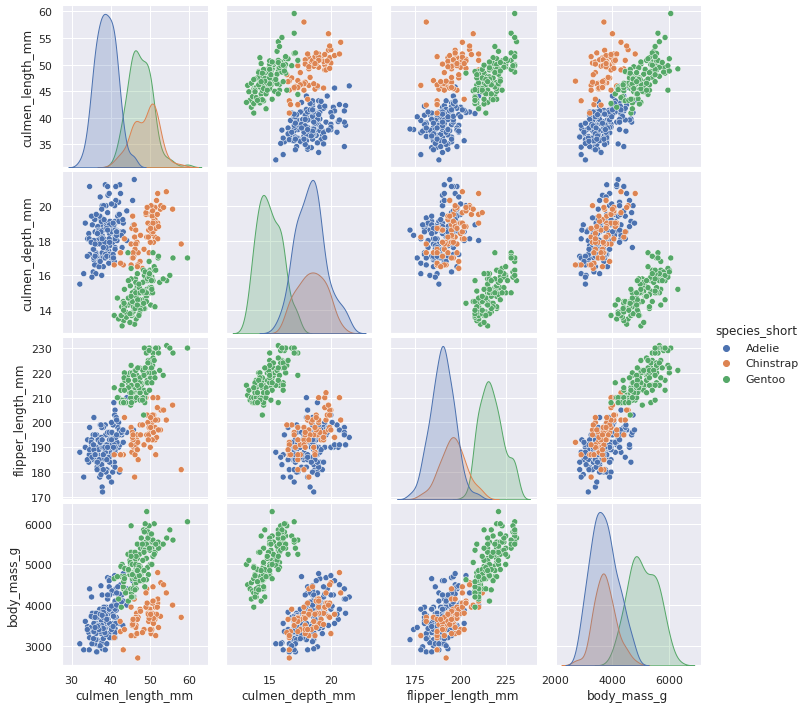

In [56]:
# Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data

import seaborn as sns
sns.pairplot(penguins, hue="species_short")

In [57]:
penguins_adelie=penguins[penguins.species_short == "Adelie"]
penguins_chinstrap=penguins[penguins.species_short == "Chinstrap"]
penguins_gentoo=penguins[penguins.species_short == "Gentoo"]

"""The following are three heatmaps for the three different species"""

'The following are three heatmaps for the three different species'

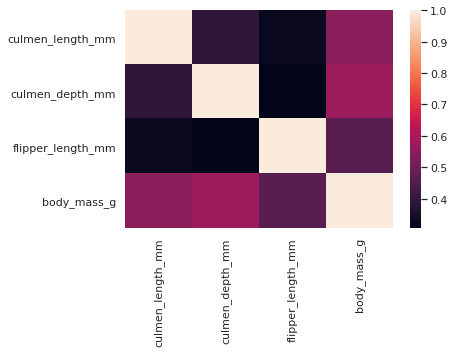

In [58]:
sns.heatmap(penguins_adelie.corr())

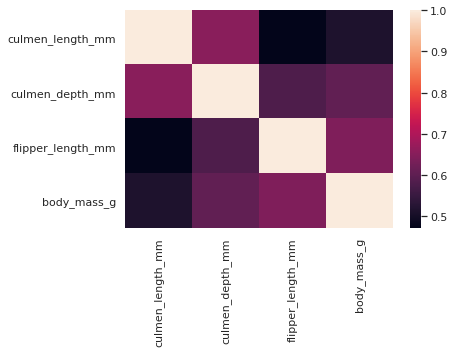

In [59]:
sns.heatmap(penguins_chinstrap.corr())

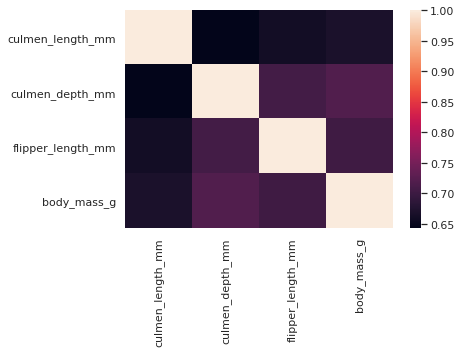

In [60]:
sns.heatmap(penguins_gentoo.corr())

'And this is a heatmap for all species'

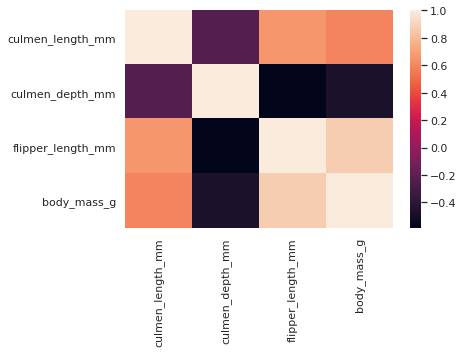

In [61]:
sns.heatmap(penguins.corr())

"""And this is a heatmap for all species"""

In [62]:
# Create a new dataset where you scale all numeric values with the standardscaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
penguins_num=penguins[["culmen_depth_mm","flipper_length_mm","body_mass_g","culmen_length_mm"]]
print(penguins_num)

     culmen_depth_mm  flipper_length_mm  body_mass_g  culmen_length_mm
0               18.7              181.0       3750.0              39.1
1               17.4              186.0       3800.0              39.5
2               18.0              195.0       3250.0              40.3
3                NaN                NaN          NaN               NaN
4               19.3              193.0       3450.0              36.7
..               ...                ...          ...               ...
339              NaN                NaN          NaN               NaN
340             14.3              215.0       4850.0              46.8
341             15.7              222.0       5750.0              50.4
342             14.8              212.0       5200.0              45.2
343             16.1              213.0       5400.0              49.9

[344 rows x 4 columns]


In [63]:
penguins_scaled = scaler.fit_transform(penguins_num)

In [71]:
"""The data are now scaled to unit size"""
pd.DataFrame(penguins_scaled, columns=penguins_num.columns).describe()

,culmen_depth_mm,flipper_length_mm,body_mass_g,culmen_length_mm
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,-1.793562e-15,-6.395144e-16,8.894769e-17,-9.024620e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.054446e+00,-2.059320e+00,-1.875362e+00,-2.168526e+00
25%,-7.866355e-01,-7.773731e-01,-8.138982e-01,-8.615697e-01
50%,7.547549e-02,-2.788381e-01,-1.895079e-01,9.686524e-02
75%,7.854492e-01,8.606705e-01,6.846384e-01,8.397670e-01
max,2.205397e+00,2.142618e+00,2.620248e+00,2.875868e+00


In [115]:
penguins_scaled_new=pd.DataFrame(data=penguins_scaled,columns=["culmen_depth_mm_sc","flipper_length_mm_sc","body_mass_g_sc","culmen_length_mm_sc"])

In [116]:
peng=pd.concat([penguins_scaled_new, penguins], axis=1)

In [117]:
peng=peng.drop(["culmen_depth_mm","flipper_length_mm","body_mass_g","culmen_length_mm"], axis=1)

In [118]:
peng.dropna()

,culmen_depth_mm_sc,flipper_length_mm_sc,body_mass_g_sc,culmen_length_mm_sc,species_short,island,sex
0,0.785449,-1.418347,-0.564142,-0.884499,Adelie,Torgersen,MALE
1,0.126188,-1.062250,-0.501703,-0.811126,Adelie,Torgersen,FEMALE
2,0.430462,-0.421277,-1.188532,-0.664380,Adelie,Torgersen,FEMALE
4,1.089724,-0.563715,-0.938776,-1.324737,Adelie,Torgersen,FEMALE
5,1.748985,-0.777373,-0.689020,-0.847812,Adelie,Torgersen,MALE
...,...,...,...,...,...,...,...
338,-1.750171,0.931890,0.903175,0.601305,Gentoo,Biscoe,FEMALE
340,-1.445897,1.003109,0.809516,0.527932,Gentoo,Biscoe,FEMALE
341,-0.735923,1.501644,1.933419,1.188289,Gentoo,Biscoe,MALE
342,-1.192335,0.789451,1.246590,0.234440,Gentoo,Biscoe,FEMALE


In [121]:
penguins_scaled_new.dropna(inplace=True)

In [125]:
# Perform a PCA analysis
from sklearn.decomposition import PCA
model=PCA()
model.fit(penguins_scaled_new)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [126]:
penguins_reduced=model.transform(penguins_scaled_new)

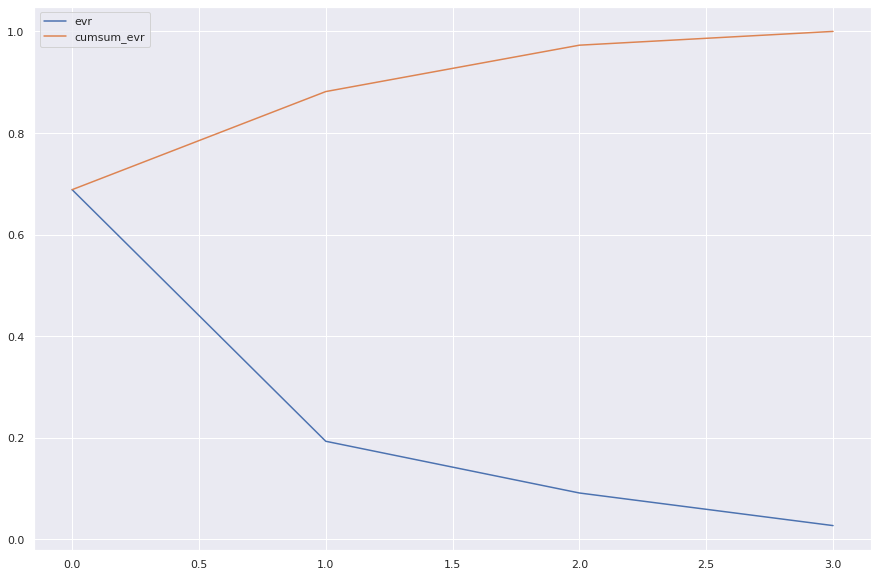

In [132]:
# Investigate the explained variance of the components... do we see an 'elbow'?
"""Yes, there is an elbow. If I'm reading this correctly, almost 90% of the variance is explained by one cluster"""
import numpy as np
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

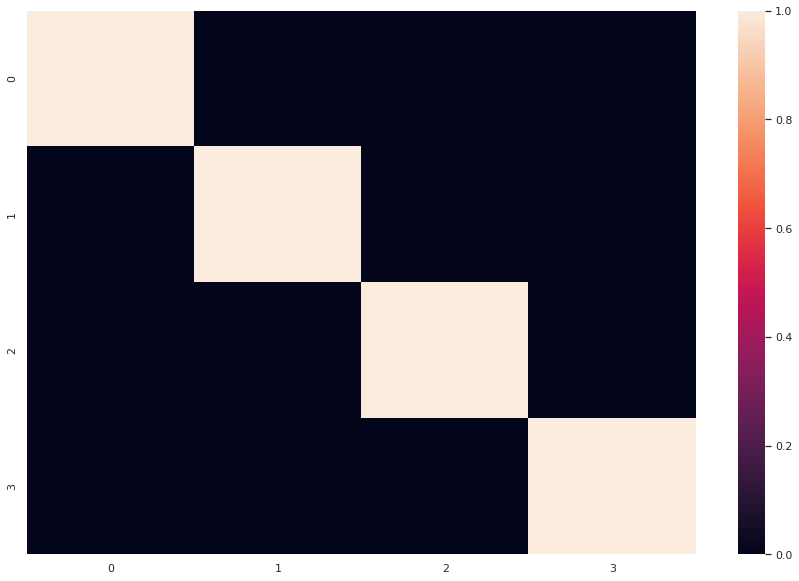

In [134]:
"I'm not sure how to interpret this, but Daniel's map in the ipynb looked te same"
sns.heatmap(pd.DataFrame(penguins_reduced).corr())

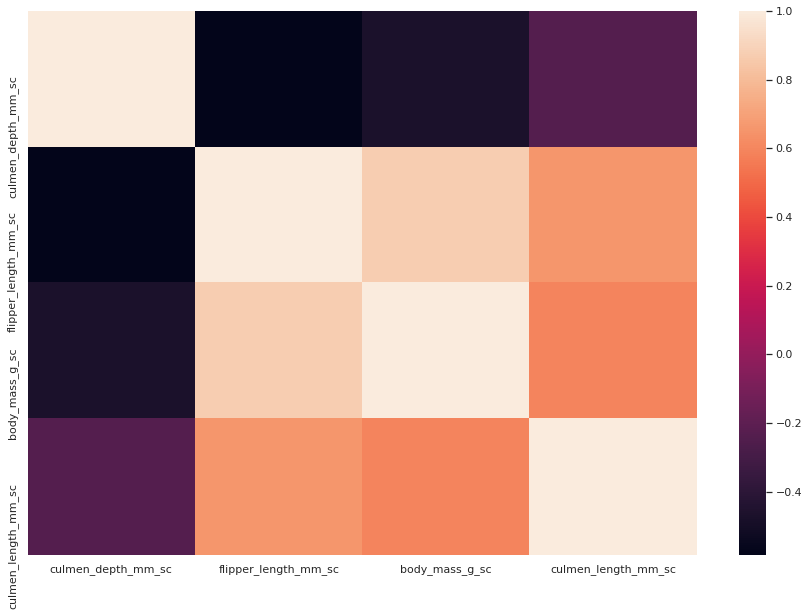

In [141]:
"""This makes more sense"""
sns.heatmap(pd.DataFrame(penguins_scaled_new).corr())

In [135]:
mean = model.mean_

In [136]:
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

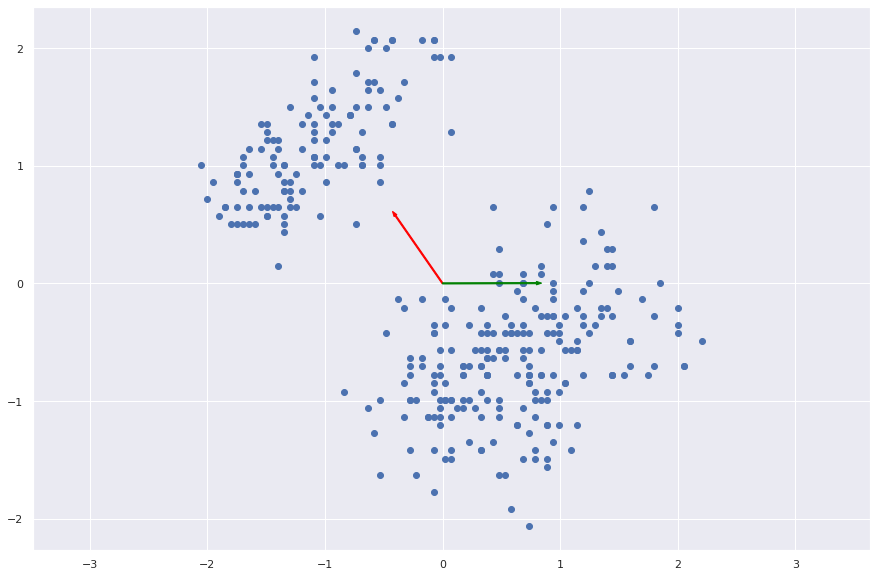

In [150]:
# Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
import matplotlib.pyplot as plt
plt.scatter(penguins_scaled_new.iloc[:,0], penguins_scaled_new.iloc[:,1])
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)
plt.axis('equal')
plt.show()

In [154]:
# Inspect the correlation between the components. Which variables are they mostly associated with?
pcscores = pd.DataFrame(penguins_reduced)
loadings = pd.DataFrame(model.components_, columns=penguins_num.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

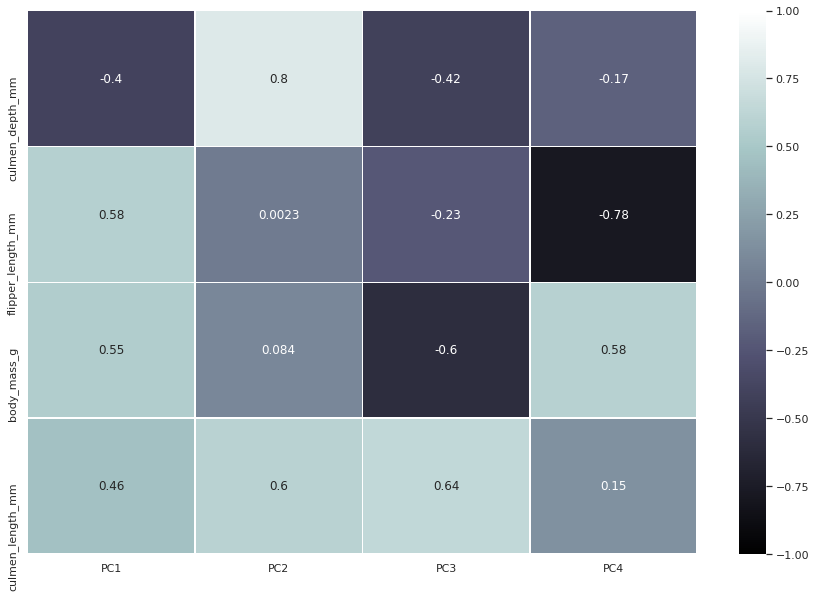

In [155]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [206]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [207]:
happy=pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv")

In [208]:
happy.head()

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v201,v202,v203,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald
0,2,1,1,1,1,1,1,2,2,4,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,1,1,2,1,1,1,1,2,2,2,...,3,1,3,2,2,1,.,1,2,2,1,1,1,3,2,1,2,1,1,1,2,1,2,2,2,2,3,2,3,3,3,2,2,1,4,4,3,2,2,48
1,1,1,2,0,1,1,2,2,1,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,1,...,3,1,2,2,3,1,1,1,1,1,1,2,1,3,2,1,2,1,1,1,2,2,1,2,2,1,1,2,3,3,1,1,2,2,2,1,2,2,1,30
2,1,1,2,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,...,3,2,3,2,3,1,3,2,2,3,1,3,2,3,2,1,2,1,1,1,2,2,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,1,1,57
3,2,1,1,1,.,1,1,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,...,3,1,3,2,3,1,1,1,2,2,1,2,2,3,1,1,2,1,2,1,2,1,2,2,2,3,3,2,4,3,2,3,2,2,4,3,3,3,2,55
4,1,1,2,0,1,1,2,1,3,3,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,.,...,.,1,.,.,.,1,1,2,.,3,1,3,.,.,1,1,2,2,2,1,2,2,2,2,2,.,4,3,3,3,3,4,4,4,4,3,3,2,4,27


In [212]:
happy.replace('.', np.NaN,inplace=True)

In [213]:
happy.dropna(how="any",inplace=True)

In [226]:
happy.head()

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v123,v124,v125,v126,v127,v128,v129,v130,v131,v132,v133,v134,v135,v136,v137,v138,v170,...,v200,v201,v202,v203,v220,v221,v222,v223,v224,v225,v226,v227,v228,v229,v230,v256,v257,v258,v259,v260,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster
1,1,1,2,0,1,1,2,2,1,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,1,...,1,2,1,3,2,1,2,1,1,1,2,2,1,2,2,1,1,2,3,3,1,1,2,2,2,1,2,2,1,30,1,0,0,4,4,4,1,0,5,4
2,1,1,2,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,...,1,3,2,3,2,1,2,1,1,1,2,2,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,1,1,57,1,0,0,1,1,0,3,3,3,1
7,1,1,2,0,1,1,2,1,3,4,1,1,1,1,1,2,1,1,1,2,1,1,1,2,1,2,1,2,2,2,2,1,2,1,2,1,1,2,2,2,...,1,2,3,3,2,1,2,1,2,1,2,1,2,1,2,3,3,3,3,4,2,2,3,3,4,2,2,2,3,32,0,2,2,2,2,2,2,2,0,2
9,1,1,1,1,1,1,1,2,2,3,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,1,2,2,1,1,1,1,2,2,2,...,2,2,2,3,1,1,2,1,2,1,2,2,2,1,2,3,3,2,2,2,2,2,2,2,3,2,2,2,2,58,1,0,0,1,1,0,3,3,3,1
10,1,1,2,0,1,2,2,3,1,4,2,2,2,2,2,2,2,1,2,1,2,2,2,1,1,2,2,2,2,2,1,1,2,2,1,2,1,2,2,2,...,1,2,2,3,1,1,2,1,2,1,2,2,2,1,2,2,3,3,3,2,2,2,2,2,4,3,2,2,2,39,0,2,2,2,2,2,2,2,0,2


In [215]:
happy_x=happy[["v7","v9","v10","v14","v56","v57","v58","v59","v60","v61","v104","v105","v10","v107","v108","v109","v110","v111","v112","v113","v114","v115","v116","v123","v124","v125","v126","v127","v128","v129","v130","v131","v132","v133","v134","v135","v136","v137","v138","v170","v171","v172","v173","v174","v175","v176","v179","v180","v182","v188","v189","v190","v191","v192","v193","v194","v195","v196","v197","v198","v199","v200","v201","v202","v203","v220","v221","v222","v223","v224","v225","v226","v227","v228","v229","v230","v256","v257","v258","v259","v260","v261","v262","v263","v264","v265","v266","v267","v268","v269"]]
happy_x1=happy[["v7","v9","v10","v14","v56","v57","v58","v59","v60","v61","v104","v105","v10","v107","v108","v109","v110","v111","v112","v113","v114","v115","v116","v123","v124","v125","v126","v127","v128","v129","v130","v131","v132","v133","v134","v135","v136","v137","v138","v170","v171","v172","v173","v174","v175","v176","v179","v180","v182","v188","v189","v190","v191","v192","v193","v194","v195","v196","v197","v198","v199","v200","v201","v202","v203","v220","v221","v222","v223","v224","v225","v226","v227","v228","v229","v230","v256","v257","v258","v259","v260","v261","v262","v263","v264","v265","v266","v267","v268","v269"]]

In [216]:
linked=linkage(happy_x, "ward")

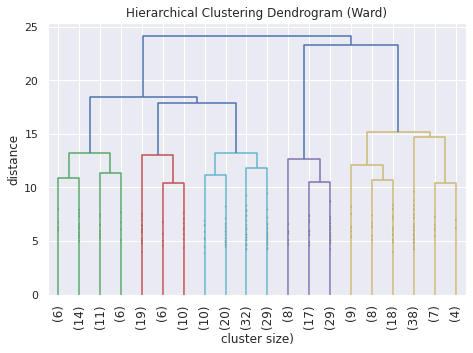

In [217]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

In [220]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(happy_x)
    labels=cluster.labels_
    dbs=davies_bouldin_score(happy_x, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(happy_x, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(happy_x, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    happy['cluster'+k]=labels

Cluster count- 2 |  db score- 4.95 |  ch score -  11.9 |  ss score -  0.03
Cluster count- 3 |  db score- 4.04 |  ch score -  11.89 |  ss score -  0.03
Cluster count- 4 |  db score- 4.11 |  ch score -  10.53 |  ss score -  0.02
Cluster count- 5 |  db score- 3.88 |  ch score -  9.81 |  ss score -  0.02
Cluster count- 6 |  db score- 3.89 |  ch score -  8.98 |  ss score -  0.02
Cluster count- 7 |  db score- 3.59 |  ch score -  8.39 |  ss score -  0.02
Cluster count- 8 |  db score- 3.74 |  ch score -  7.84 |  ss score -  0.01
Cluster count- 9 |  db score- 3.6 |  ch score -  7.43 |  ss score -  0.02
Cluster count- 10 |  db score- 3.47 |  ch score -  7.11 |  ss score -  0.02


In [222]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(happy_x)
labels=cluster.labels_
happy['cluster']=labels



... and the results for 2 clusters are!
cluster2     0     1
v7        1.38  1.44
v9        1.00  1.00
v14       1.64  1.96

And the size of the clusters if there are 2 clusters are
           v7   v9  v10  v14  ...  cluster8  cluster9  cluster10  cluster
cluster2                      ...                                        
0         138  138  138  138  ...       138       138        138      138
1         163  163  163  163  ...       163       163        163      163

[2 rows x 100 columns]

And if we have 2 clusters, the dendrogram looks like


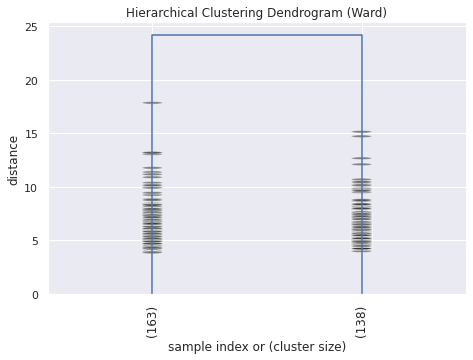



... and the results for 3 clusters are!
cluster3     0     1     2
v7        1.44  1.38  1.37
v9        1.00  1.00  1.00
v14       1.96  2.48  0.33

And the size of the clusters if there are 3 clusters are
           v7   v9  v10  v14  ...  cluster8  cluster9  cluster10  cluster
cluster3                      ...                                        
0         163  163  163  163  ...       163       163        163      163
1          84   84   84   84  ...        84        84         84       84
2          54   54   54   54  ...        54        54         54       54

[3 rows x 100 columns]

And if we have 3 clusters, the dendrogram looks like


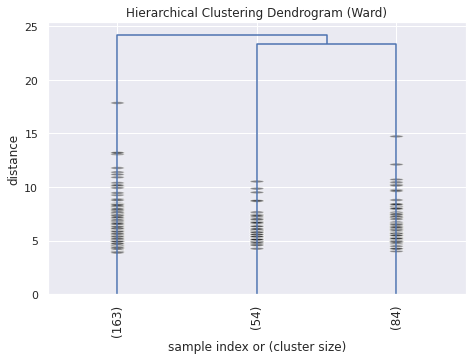



... and the results for 4 clusters are!
cluster4     0     1     2     3
v7        1.47  1.38  1.37  1.32
v9        1.00  1.00  1.00  1.00
v14       1.73  2.48  0.33  2.76

And the size of the clusters if there are 4 clusters are
           v7   v9  v10  v14  ...  cluster8  cluster9  cluster10  cluster
cluster4                      ...                                        
0         126  126  126  126  ...       126       126        126      126
1          84   84   84   84  ...        84        84         84       84
2          54   54   54   54  ...        54        54         54       54
3          37   37   37   37  ...        37        37         37       37

[4 rows x 100 columns]

And if we have 4 clusters, the dendrogram looks like


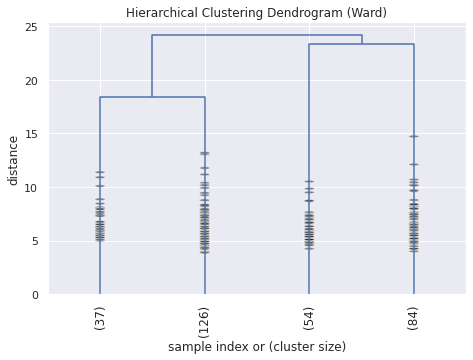



... and the results for 5 clusters are!
cluster5     0     1     2     3     4
v7        1.38  1.37  1.37  1.32  1.71
v9        1.00  1.00  1.00  1.00  1.00
v14       2.48  1.82  0.33  2.76  1.49

And the size of the clusters if there are 5 clusters are
          v7  v9  v10  v14  ...  cluster8  cluster9  cluster10  cluster
cluster5                    ...                                        
0         84  84   84   84  ...        84        84         84       84
1         91  91   91   91  ...        91        91         91       91
2         54  54   54   54  ...        54        54         54       54
3         37  37   37   37  ...        37        37         37       37
4         35  35   35   35  ...        35        35         35       35

[5 rows x 100 columns]

And if we have 5 clusters, the dendrogram looks like


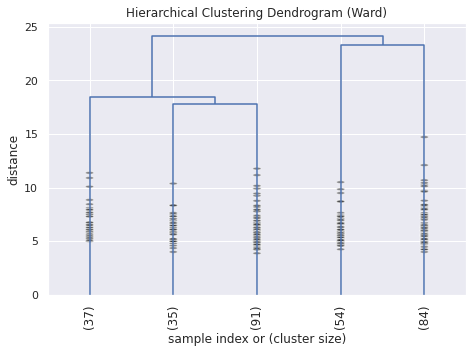

In [227]:
for i in range(2,6):
    i=str(i)
    happy_x1=happy[["cluster"+i,"v7","v9","v10","v14","v56","v57","v58","v59","v60","v61","v104","v105","v10","v107","v108","v109","v110","v111","v112","v113","v114","v115","v116","v123","v124","v125","v126","v127","v128","v129","v130","v131","v132","v133","v134","v135","v136","v137","v138","v170","v171","v172","v173","v174","v175","v176","v179","v180","v182","v188","v189","v190","v191","v192","v193","v194","v195","v196","v197","v198","v199","v200","v201","v202","v203","v220","v221","v222","v223","v224","v225","v226","v227","v228","v229","v230","v256","v257","v258","v259","v260","v261","v262","v263","v264","v265","v266","v267","v268","v269"]]
    stuff=happy_x1.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("")
    count=happy.groupby(['cluster'+i]).count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...

## Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

In [ ]:
# Your solutions from here...

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [ ]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [ ]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [ ]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [ ]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [ ]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [ ]:
nx.overall_reciprocity(G_friendship)

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

In [ ]:
# Your solutions here...

## Network analysis: Case Study 2 in 2-Mode Networks: Exploring Instagram Hashtag Networks

In this notebook, we will collect data from Instagram to construct (snowball) a network of hashtags as well as a (2-mode) bipartite network of Instagram users and hashtags.

The networks in this example can be considered synthetic, since nodes and particularly edges represent virtual constructs rather than explicit connections.


In this case we explore

- Graph construction (normal and bipartite)
- Calculation of centrality indicators 
- Community detection
- Projection of bipartite network

Furthermore you will learn:

- to make simple (public) API requests (API: Application Programming Interface) 
- parse json response
- perform simple string manipulation/text-mining to extract features of interest (Transition into NLP)

### So what?

Such an analysis can be useful in marketing to identify sub-dicussions in a niche or related to a brand. We will detect popular hashtags within sub-niches that "correlate" with a topic of interest.
Furthermore, we will identify accounts with high engagement (post-counts) within specific hashtag communities.

Unfortunately Instagram, very recently (few days back), diesabled a simple public API that allowed to map usernames form user-ids. Therefore, we will use ```instaloader```, a module for interacting with Instagram. 

We will only use public data that does not require log-in. If you want to explore other graph structures on Instagram (e.g. follow-networks), have a look at Instabot.

### Tooling Setup

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx
import community

from nltk.tokenize import TweetTokenizer # A bit of a transition into NLP. The tweet tokenizer from the NLTK library will help us extract the hashtags from post-text
tknzr = TweetTokenizer()
import requests as rq # The requests library handles "requests" to APIs similar to a browser that requests a webpage given a URL
from networkx.algorithms import bipartite # bipartite NW algos

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

### Getting the data

In [ ]:
# Defining global constants for the instagram extract

# Note: These things may change without a warning...

# Instagram base url preffix
tagurl_prefix = 'https://www.instagram.com/explore/tags/'

# suffix to append to tag request url to retrieve data in JSON format
tagurl_suffix = '/?__a=1'

# suffix to end cursor when requesting posts by tag
tagurl_endcursor = '&max_id='

# a generic media post preffix (concat with media shortcode to view)
posturl_prefix = 'https://www.instagram.com/p/'

# target initial tags (we will run this with only one tag but the code can take multiple - just extend the list)
tags = ['machinelearning']

In [ ]:
# urls to initial tags using the above url-components
queries = [ tagurl_prefix + tag + tagurl_suffix for tag in tags ]

The response structure of this Insta endpoint is not really straightforward. You can read more about it in the original post.
The data is most likely composed on request by some large-scale graph database at returned. Instagram obviously assumes that the receiving site is a browser exploring public posts.

We also don't get all posts for some hashtag right away but a "page" ~25 posts.

To receive further posts, we need to pass a new requests specifying "our position" by providing an end_cursor.

This **end cursor** can be found in

```
response['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
```

#### Some thoughts on JSON

This brings us to JSON. Think of JSON objects as of combinations of dictionaries and lists that can contain most Python objects (e.g. lists, dictionaries, tuples, strings, ints etc.) that can be represented as text. Once parsed you can operate JSON objects just as any other dictionary or list in Python.
More about JSON - here:

In [ ]:
edges = []
for q in queries:    
    for i in range(10): # how many iterations/deepth ?
        r = rq.get(q).json()
        end_cursor = r['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
        edges.extend(r['graphql']['hashtag']['edge_hashtag_to_media']['edges'])
        print(i)
        q = q + tagurl_endcursor + end_cursor

### Bringing the collected data into useful format...

In the next step we will take the rich raw posts data and extract only the information that we need for our analysis. We will just cut out owner-id (account that posted), a shortcode that we can use to identify the post and get more data on it in future if needed, and the text including the hashtags.

To make things more compact we not only extract the raw data but we also preprocess a bit.

The hashtags are incorporated within the post-text. Therefore, we pass the text of each post through a tokenizer, that identifies individual words and elements (such as emoji). We use the tweet-tokenizer from the NLTK library, which is made for working with social media data.

```
  tokens = tknzr.tokenize(text)
  tags = [x.strip('#') for x in tokens if x.startswith('#')]
```

The first line turns the text of the post in a list of tokens (words & co.). The second line picks out only the elements that start with a "#" and strips the "#" when adding them to a list.

Then we construct a dictionary with these values and append it to a list.

This gives us a list of dicitonaries - something that we can pass to Pandas to get a dataframe we can work with.

In [ ]:
post_dicts = [] #empty list

for post in edges: #iterate all raw posts

    if post['node']['edge_media_to_caption']['edges'] == []: # hop to the next if no text in the post
        continue

    post_dict = {} # empty dictionary
    id_owner = post['node']['owner']['id'] # pick out user-id
    shortcode = post['node']['shortcode'] # pick out short post identifier
    text = post['node']['edge_media_to_caption']['edges'][0]['node']['text'] # pick out post text

    # Pick hashtags from text
    tokens = tknzr.tokenize(text)
    tags = [x.strip('#') for x in tokens if x.startswith('#')]

    # fill in dictionary with values
    post_dict['id_owner'] = id_owner
    post_dict['shortcode'] = shortcode
    post_dict['tags'] = tags
    post_dict['text'] = text

    post_dicts.append(post_dict) #append the dictionary to a list of post-dictionaries

In [ ]:
# Create DF
posts_df = pd.DataFrame(post_dicts)

# Remove hashtags that are not a hashtag (emptyspace & mistakes)
posts_df['tags'] = posts_df['tags'].map(lambda t: [x for x in t if x.isalnum()])

# Kick out posts with 0 hashtags
posts_df = posts_df[posts_df['tags'].map(len) != 0]

### Simple stats

In [ ]:
# People with most posts (no names though)
posts_df['id_owner'].value_counts()

### Creating a graph

In [ ]:
# Create empty undirected Graph
G = nx.Graph()

We will construct the graph from hashtag combinations of each post. We will use `itertools.combinations` for that. Given a list of n objects this will create all possible unique combinations of size k (which we set to 2). Note, that we can build up the Graph sequentially. An edgelist contains all data we need.

In [ ]:
# Create the graph
for i in posts_df['tags']:
    G.add_edges_from(list(itertools.combinations(i,2)))

### Preprocessing the Graph

It can be a good idea to filter the Graph before analysing. For instance, we can remove all hashtags with low degree-centrality. This can be interpreted as - kicking out made up hashtags or extremely underused ones. We will calculate a percentile threshold and exclude everything under it.

In [ ]:
# Calculating degree centrality for the Graph
degree_centrality = nx.degree_centrality(G)

In [ ]:
# Getting a "reasonable" lower bound.
perc_filter = np.percentile([v for u,v in degree_centrality.items()], 20)

In [ ]:
# Make a subgraph based on nodes with a degree_centrality over the threshold
nodes_selected = [x for x,y in degree_centrality.items() if y >= perc_filter]

G = G.subgraph(nodes_selected)

### Analysing the Graph

Now we are going to calculate some network indicators and once done, we will export a DataFrame analyse them further.

In [ ]:
# Recalculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

In [ ]:
# Same for Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector, 'eigenvector_centrality')

In [ ]:
# Same for community detection
communities = community.best_partition(G, resolution = 1)
nx.set_node_attributes(G, communities, 'community')

In [ ]:
graph_df = pd.DataFrame(dict(G.nodes(data=True))).T

In [ ]:
graph_df['community'].value_counts(normalize=True)

In [ ]:
# Find the 5 most popular hashtags for each identified community
tag_per_com = graph_df.groupby('community')['degree'].nlargest(5)

In [ ]:
tag_per_com[0]

### Bipartite graph between users and hashtags

Can we identify communities of users given their usage of hashtags?

In [ ]:
# Create a new graph
B = nx.Graph()

In [ ]:
# we will take the same data
posts_df.head()

In [ ]:
# We need to specify the nodes for level 0 - this will be our users
B.add_nodes_from(list(set(posts_df.id_owner)), bipartite=0)

In [ ]:
# Then we need to add hashtags nodes as level 1 nodes
B.add_nodes_from(list(set(itertools.chain(*posts_df.tags))), bipartite=1)

In [ ]:
# This quick loop will generate edges between users and hashtags
# Every time someone mentions a #hashtag, a link is created

bi_edges = []
for i in posts_df[['id_owner','tags']].iterrows(): # we do this row-by-row since each row is a post
    id_owner = i[1]['id_owner']
    for j in i[1]['tags']:
        bi_edges.append((id_owner, j)) # edges are appended to a list as a tuple (id_owner, hashtag)

In [ ]:
# Let's add the edges to our graph
B.add_edges_from(bi_edges)

In the next step we will project the graph onto the account-level. For this we need to get the nodesets of the 0 level. We also calculate the level 1 level (just because)

In [ ]:
# Extract a set of nodes with level 0
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}

# the remaining nodes are then level 1
bottom_nodes = set(B) - top_nodes

In [ ]:
# Let's project this graph using a weighted projection
G_proj = bipartite.weighted_projected_graph(B, top_nodes)

In [ ]:
# Again, we can identify communities
bi_communities = community.best_partition(G_proj, resolution = 1)
nx.set_node_attributes(G_proj, bi_communities, 'community')

In [ ]:
# Calculate eigenvector centrality and set it as an attribute
bi_eigenvector = nx.eigenvector_centrality(G_proj)
nx.set_node_attributes(G_proj, bi_eigenvector, 'eigenvector_centrality')

In [ ]:
# Create a new attribute "activity" - or propensity to spam
nx.set_node_attributes(G_proj, dict(posts_df.id_owner.value_counts()), 'activity' )

In [ ]:
# Do spammers connect more in terms of spamming about the same stuff?
print(nx.numeric_assortativity_coefficient(G_proj,'activity'))

In [ ]:
graph_proj_df = pd.DataFrame(dict(G_proj.nodes(data=True))).T

In [ ]:
graph_proj_df.head()

In [ ]:
# Find the 5 most central for each identified community
user_per_com = graph_proj_df.groupby('community')['eigenvector_centrality'].nlargest(5)

In [ ]:
user_per_com

### The assignment

Basically, try to repeat the exercise on your own with a term of your choice. 

1. Just run the code from before, where you replace 'machinelearning' with whatever discussion you are interested to map.
2. Create the query link as in the notebook.
3. Since the instaloader is not working at the moment (seems to be blocked), you have to click on the query link to get the output in your web-browser. C&P it then, and save it in a text file (something like the text editor. that saves unformatted text.)
4. Now you can analyse the  instagram network.

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

In [ ]:
# Load the data

stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [ ]:
# Your solutions from here...

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

In [ ]:
# Your solutions from here...